In [265]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
from sklearn.metrics import mean_squared_error 

### Decision Tree

In [266]:
#df = pd.read_csv('Next 6 Months - Data.csv')
df = pd.read_csv('Final_Data.csv')
df = df[:1496]

Adding feature to capture volatility of the day

In [267]:
df['Day Range'] = df['High'] - df['Low']

Converting Dates to Month and Day Columns

In [268]:
dates = df["Date"].str.split('/').to_numpy()
months = [int(i[0]) for i in dates]
day = [int(i[1]) for i in dates]
df["Months"] = pd.DataFrame(months)
df["Day"] = pd.DataFrame(day)
df = df.drop(columns = ["Date"])
display(df)

,Open,High,Low,Close,Volume,Previous Day Close,Previous Week Close,Previous Day Interest (EFFR),Previous Mo. Inflation (CPI),Label: Next 6 Months Opening,Day Range,Months,Day
0,2139.43,2142.63,2130.09,2141.16,654860857,2141.34,2132.98,0.41,2.2,2443.25,12.54,10,21
1,2148.50,2154.79,2146.91,2151.33,523564705,2141.16,2126.50,0.41,2.2,2447.83,7.88,10,24
2,2149.72,2151.44,2141.93,2143.16,530792143,2151.33,2139.60,0.41,2.2,2459.27,9.51,10,25
3,2136.97,2145.73,2131.59,2139.43,562087522,2143.16,2144.29,0.41,2.2,2459.14,14.14,10,26
4,2144.06,2147.13,2132.52,2133.04,614708800,2139.43,2141.34,0.41,2.2,2460.61,14.61,10,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1326,4336.19,4432.72,4292.46,4431.85,2913164357,4326.51,4397.94,0.08,5.5,3677.95,140.26,1,28
1327,4431.79,4516.89,4414.02,4515.55,2963155477,4431.85,4410.13,0.08,5.5,3719.98,102.87,1,31
1328,4519.57,4550.49,4483.53,4546.54,2712733572,4515.55,4356.45,0.08,6.0,3695.16,66.96,2,1
1329,4566.39,4595.31,4544.32,4589.38,2903950893,4546.54,4349.93,0.08,6.0,3665.78,50.99,2,2


In [297]:
X = df.iloc[: , [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12]]
y = df.iloc[:, [9]]
y = y.astype('int')
#print(len(X))
X_train = X.iloc[:-30, :]
y_train = y.iloc[:-30, :]
X_test = X.iloc[-30:, :]
y_test = y.iloc[-30:, :]
display(X)

,Open,High,Low,Close,Volume,Previous Day Close,Previous Week Close,Previous Day Interest (EFFR),Previous Mo. Inflation (CPI),Day Range,Months,Day
0,2139.43,2142.63,2130.09,2141.16,654860857,2141.34,2132.98,0.41,2.2,12.54,10,21
1,2148.50,2154.79,2146.91,2151.33,523564705,2141.16,2126.50,0.41,2.2,7.88,10,24
2,2149.72,2151.44,2141.93,2143.16,530792143,2151.33,2139.60,0.41,2.2,9.51,10,25
3,2136.97,2145.73,2131.59,2139.43,562087522,2143.16,2144.29,0.41,2.2,14.14,10,26
4,2144.06,2147.13,2132.52,2133.04,614708800,2139.43,2141.34,0.41,2.2,14.61,10,27
...,...,...,...,...,...,...,...,...,...,...,...,...
1326,4336.19,4432.72,4292.46,4431.85,2913164357,4326.51,4397.94,0.08,5.5,140.26,1,28
1327,4431.79,4516.89,4414.02,4515.55,2963155477,4431.85,4410.13,0.08,5.5,102.87,1,31
1328,4519.57,4550.49,4483.53,4546.54,2712733572,4515.55,4356.45,0.08,6.0,66.96,2,1
1329,4566.39,4595.31,4544.32,4589.38,2903950893,4546.54,4349.93,0.08,6.0,50.99,2,2


In [270]:
from itertools import chain, combinations

def powerset(iterable):
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))
#print(list(powerset([0, 4, 7, 8, 10, 11 ,12])))
set_lst = []
for item in list(powerset([4, 7, 8, 10, 11 ,12])):
    set_lst.append(list(item))
print(set_lst)
print(len(set_lst))


[[], [4], [7], [8], [10], [11], [12], [4, 7], [4, 8], [4, 10], [4, 11], [4, 12], [7, 8], [7, 10], [7, 11], [7, 12], [8, 10], [8, 11], [8, 12], [10, 11], [10, 12], [11, 12], [4, 7, 8], [4, 7, 10], [4, 7, 11], [4, 7, 12], [4, 8, 10], [4, 8, 11], [4, 8, 12], [4, 10, 11], [4, 10, 12], [4, 11, 12], [7, 8, 10], [7, 8, 11], [7, 8, 12], [7, 10, 11], [7, 10, 12], [7, 11, 12], [8, 10, 11], [8, 10, 12], [8, 11, 12], [10, 11, 12], [4, 7, 8, 10], [4, 7, 8, 11], [4, 7, 8, 12], [4, 7, 10, 11], [4, 7, 10, 12], [4, 7, 11, 12], [4, 8, 10, 11], [4, 8, 10, 12], [4, 8, 11, 12], [4, 10, 11, 12], [7, 8, 10, 11], [7, 8, 10, 12], [7, 8, 11, 12], [7, 10, 11, 12], [8, 10, 11, 12], [4, 7, 8, 10, 11], [4, 7, 8, 10, 12], [4, 7, 8, 11, 12], [4, 7, 10, 11, 12], [4, 8, 10, 11, 12], [7, 8, 10, 11, 12], [4, 7, 8, 10, 11, 12]]
64


C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\2185872266.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\2185872266.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\2185872266.py:16

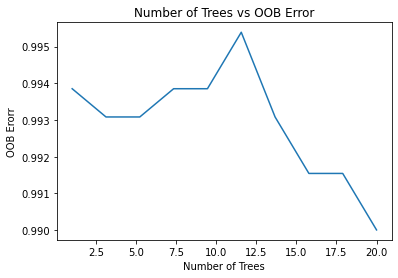

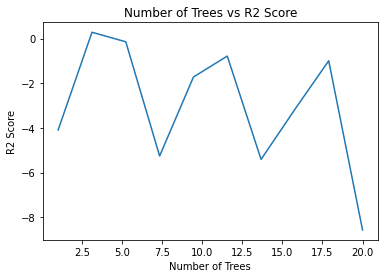

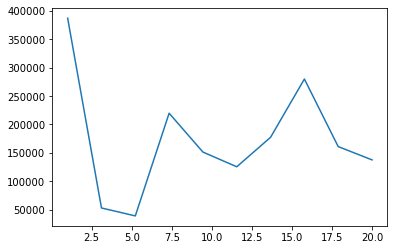

0.28567745142311596 -0.29861085302241014


In [284]:
#FINDING RIGHT NUMBER OF TREES
oob = []
scores_r2 = []
scores_mse = []
X = df.iloc[: , [0, 4, 7, 8, 10, 11]]
y = df.iloc[:, [9]]
y = y.astype('int')
#print(len(X))
X_train = X.iloc[:-30, :]
y_train = y.iloc[:-30, :]
X_test = X.iloc[-30:, :]
y_test = y.iloc[-30:, :]
#for dummy in range(100):
for n in range(2, 21, 2):
    clf = RandomForestClassifier(n_estimators = n, oob_score = True)
    clf.fit(X_train, y_train)
    #oob[n] = min(oob.get(n,1), (1 - clf.oob_score_))
    y_pred = clf.predict(X_test)
    oob_score = 1 - clf.oob_score_
    oob.append(oob_score)
    score_r2 = r2_score(y_pred,y_test)
    scores_r2.append(score_r2)
    score_mse = mean_squared_error(y_pred, y_test)
    scores_mse.append(score_mse)
    #scores[n] = max(scores.get(n,0), score)
        
        #plt.bar(n, clf.oob_score_, alpha=0.5, align='center', label='OOB Score based on Number of Trees')
x = np.linspace(1, 20, 10)
plt.plot(x, oob)
plt.xlabel('Number of Trees')
plt.ylabel('OOB Erorr')
plt.title('Number of Trees vs OOB Error')
plt.show()
plt.plot(x, scores_r2)
plt.xlabel('Number of Trees')
plt.ylabel('R2 Score')
plt.title('Number of Trees vs R2 Score')
plt.show()
plt.plot(x, scores_mse)
plt.show()
print(max(scores_r2), sum(scores_r2)/100)

C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\3991428047.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\3991428047.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\3991428047.py:16

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\3991428047.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\3991428047.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_fores

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\3991428047.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\3991428047.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_fores

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\3991428047.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\3991428047.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_fores

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\3991428047.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\3991428047.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_fores

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\3991428047.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\3991428047.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_fores

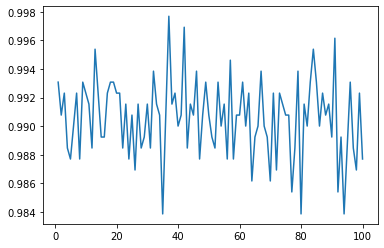

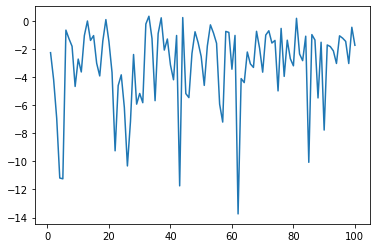

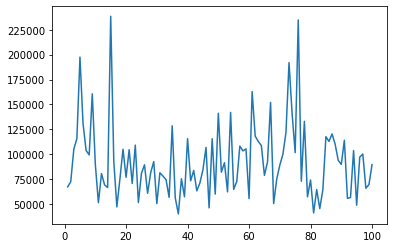

0.31767133472920295 -3.1536904079870753
40138.6 92648.93066666662


In [289]:
oob = []
scores_r2 = []
scores_mse = []
X = df.iloc[: , [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12]]
y = df.iloc[:, [9]]
y = y.astype('int')
#print(len(X))
X_train = X.iloc[:-30, :]
y_train = y.iloc[:-30, :]
X_test = X.iloc[-30:, :]
y_test = y.iloc[-30:, :]
max_r2 = 0
#for dummy in range(100):
for n in range(1, 101):
    clf = RandomForestClassifier(n_estimators = 5, oob_score = True)
    clf.fit(X_train, y_train)
    #oob[n] = min(oob.get(n,1), (1 - clf.oob_score_))
    y_pred = clf.predict(X_test)
    oob_score = 1 - clf.oob_score_
    oob.append(oob_score)
    score_r2 = r2_score(y_pred,y_test)
    scores_r2.append(score_r2)
    score_mse = mean_squared_error(y_pred, y_test)
    scores_mse.append(score_mse)
    if score_r2 > max_r2:
        best_model = clf
        max_r2 = score_r2
    #scores[n] = max(scores.get(n,0), score)
        
        #plt.bar(n, clf.oob_score_, alpha=0.5, align='center', label='OOB Score based on Number of Trees')
x = np.linspace(1, 100, 100)
plt.plot(x, oob)
plt.show()
plt.plot(x, scores_r2)
plt.show()
plt.plot(x, scores_mse)
plt.show()
print(max(scores_r2), sum(scores_r2)/100)
print(min(scores_mse), sum(scores_mse)/100)

[0.10058178 0.09041279 0.08612183 0.0993966  0.10939395 0.10467554
 0.10356759 0.04375289 0.0274124  0.10798548 0.04140908 0.08529007]
4


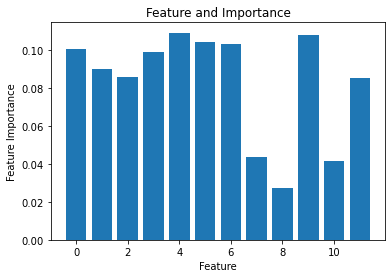

In [299]:
print(best_model.feature_importances_)
max_s = max(best_model.feature_importances_)
best_feature = np.where(best_model.feature_importances_ == max_s)
print(int(best_feature[0][0]))
lst = list(enumerate(best_model.feature_importances_))
lst.sort(key = lambda x: x[1])
plt.bar(np.linspace(0,11,12), best_model.feature_importances_)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature vs Feature Importance')
plt.show()

C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\3419023718.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\3419023718.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\3419023718.py:15

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\3419023718.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\3419023718.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_fores

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\3419023718.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\3419023718.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_fores

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\3419023718.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\3419023718.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_fores

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\3419023718.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\3419023718.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_fores

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\3419023718.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\3419023718.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_fores

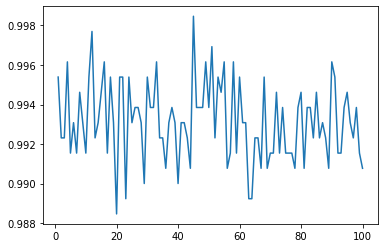

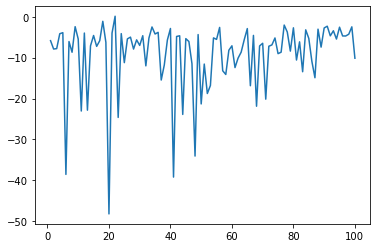

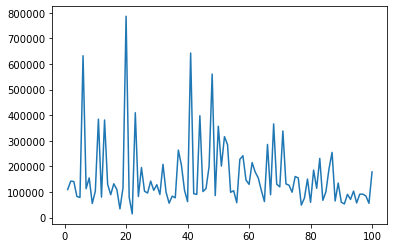

0.11567834730968818 -9.156527192072403


In [254]:
oob = []
scores_r2 = []
scores_mse = []
X = df.iloc[: , [0, 4, 7, 8, 10, 11]]
y = df.iloc[:, [9]]
y = y.astype('int')
#print(len(X))
X_train = X.iloc[:-30, :]
y_train = y.iloc[:-30, :]
X_test = X.iloc[-30:, :]
y_test = y.iloc[-30:, :]
#for dummy in range(100):
for n in range(1, 101):
    clf = RandomForestClassifier(n_estimators = 5, oob_score = True)
    clf.fit(X_train, y_train)
    #oob[n] = min(oob.get(n,1), (1 - clf.oob_score_))
    y_pred = clf.predict(X_test)
    oob_score = 1 - clf.oob_score_
    oob.append(oob_score)
    score_r2 = r2_score(y_true = y_test, y_pred = y_pred)
    scores_r2.append(score_r2)
    score_mse = mean_squared_error(y_pred, y_test)
    scores_mse.append(score_mse)
    #scores[n] = max(scores.get(n,0), score)
        
        #plt.bar(n, clf.oob_score_, alpha=0.5, align='center', label='OOB Score based on Number of Trees')
x = np.linspace(1, 100, 100)
plt.plot(x, oob)
plt.show()
plt.plot(x, scores_r2)
plt.show()
plt.plot(x, scores_mse)
plt.show()
print(max(scores_r2), sum(scores_r2)/100)

In [227]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
max_scores = {}
X = df.iloc[: , [0, 4, 7, 8, 10, 11]]
y = df.iloc[:, [9]]
y = y.astype('int')
#print(len(X))
X_train = X.iloc[:-30, :]
y_train = y.iloc[:-30, :]
X_test = X.iloc[-30:, :]
y_test = y.iloc[-30:, :]
for lst in set_lst:
    scores = []
    X_train = df.iloc[:-30 , [0] + lst]
    y_train = y.iloc[:-30, :]
    X_test = df.iloc[-30:, [0] + lst]
    y_test = y.iloc[-30:, :]
    for n in range(1, 20):
        forest = RandomForestClassifier(n_estimators=n, oob_score = True)
        forest.fit(X_train, y_train)
        y_pred = forest.predict(X_test)
        score = r2_score(y_pred,y_test)
        scores.append(score)
    max_scores[(max(scores))] = (scores.index(max(scores)), 1-forest.oob_score_, [0] + lst)




C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188

C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\

C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188

C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\

C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\

C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\nahom\AppData\Local\Temp\ipykernel_14156\1663314188.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)
C:\Users\nahom\anaconda3\lib\site-packages\sklearn\ensemble\

In [228]:
print(max(max_scores.keys()), max_scores[max(max_scores.keys())])

0.11277115573087537 (13, 0.984993178717599, [0, 4, 7, 8, 10, 11, 12])


In [82]:
print(max(max_scores.keys()), max_scores[max(max_scores.keys())])

(0.7258826994096697, 4) [0, 4, 7, 8, 10, 11]


### Analysis

With n=5 we get a decent R2 score of 0.7258826994096697
Features Used:
1. Open
2. Volume
3. Previous Day Interest 
4. Previous Mo. Inflation
5. Day Range
6. Month